In [1]:
import pandas as pd
import numpy as np
import plotly
from scipy import stats
from sklearn import linear_model
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [2]:
circuits_df = pd.read_csv("C:/Users/gabri/OneDrive/Área de Trabalho/F1_Dataset/circuits.csv", encoding='ISO-8859-1')
constructorResults_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\constructorResults.csv", encoding='ISO-8859-1')
constructors_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\constructors.csv", encoding='ISO-8859-1')
constructorStandings_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\constructorStandings.csv", encoding='ISO-8859-1')
drivers_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\drivers.csv", encoding='ISO-8859-1')
driverStandings_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\driverStandings.csv", encoding='ISO-8859-1')
lapTimes_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\lapTimes.csv", encoding='ISO-8859-1')
pitStops_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\pitStops.csv", encoding='ISO-8859-1')
qualifying_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\qualifying.csv", encoding='ISO-8859-1')
races_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\races.csv", encoding='ISO-8859-1')
results_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\results.csv", encoding='ISO-8859-1')
seasons_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\seasons.csv", encoding='ISO-8859-1')
status_df = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\F1_Dataset\status.csv", encoding='ISO-8859-1')

In [3]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,54,NaN,NaN,33.0,16.0,01:43.8,192.542,11
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,54,NaN,NaN,36.0,15.0,01:43.6,193.057,11
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,54,NaN,NaN,52.0,6.0,01:42.3,195.402,11
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


In [4]:
#given grid predict resultID
Y = results_df['positionOrder']
x1 = results_df['grid']
x2 = Y - x1

In [5]:
coeff = np.corrcoef(Y,[x1,x2])
coeff

array([[ 1.        ,  0.13176499,  0.68550785],
       [ 0.13176499,  1.        , -0.63139129],
       [ 0.68550785, -0.63139129,  1.        ]])

In [6]:
coeff[1,2]

-0.6313912923588532

In [11]:
t = np.vstack(x2)

In [28]:
reg = linear_model.LinearRegression()

free_variables = [x2]
y = np.vstack(Y) #shape (N,) / (1d,)
X = np.vstack(free_variables).T

In [29]:
y.shape

(23777, 1)

In [30]:
reg.fit(X, y)
reg.score(X, y)

0.46992100721703595

In [31]:
reg.coef_

array([[0.53626261]])

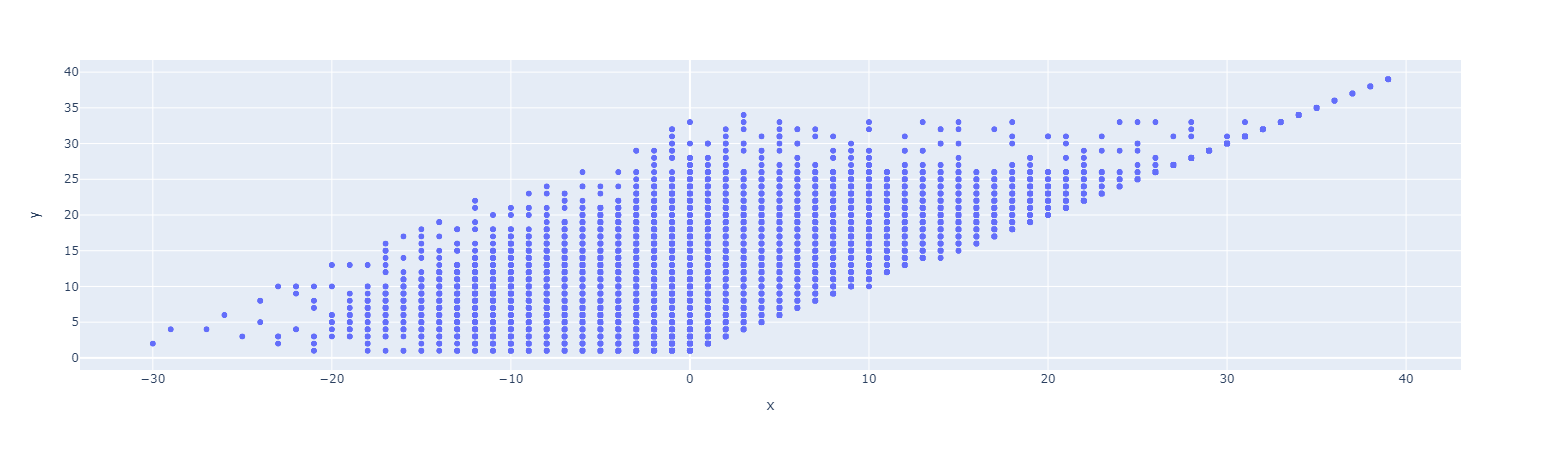

In [32]:
fig = px.scatter(x=x2, y=Y)
fig.show()